In [1]:
import numpy as np 
import pandas as pd 


In [2]:
data = pd.read_csv("clean_fusionne.csv")

In [3]:
data.head()



,Text,Toxic/Not Toxic
0,يبغي التنبيه على ان السعودية تستخدم صواريخ جو-...,1
1,أمريكا قتلت بالامس معوق رفض رفع يديه فماذا تري...,1
2,هذا الشخص هو من كان مؤيد لاحتلال العراق وضرب ا...,1
3,الى جمال ريان مذيع الجزيرة نحن من رعاك فى المه...,1
4,خيبة الأمل ليست تشاؤما ولا تقولا ٠\nعزم لكفالة...,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77176 entries, 0 to 77175
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             77076 non-null  object
 1   Toxic/Not Toxic  77176 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


<Axes: >

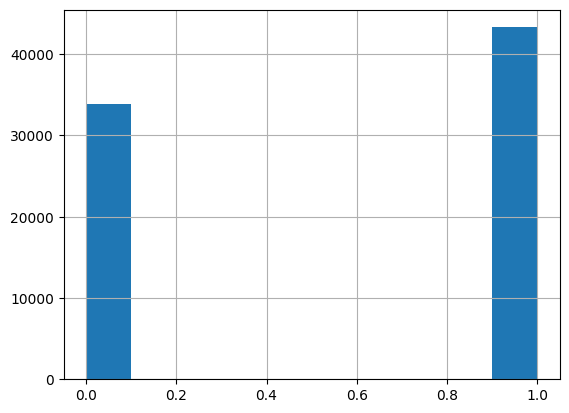

In [5]:
data['Toxic/Not Toxic'].hist()

In [6]:
import pandas as pd
import re
from camel_tools.tokenizers.word import simple_word_tokenize

# Load your data

# Function to preprocess text
def preprocess_text(text):
    # Convert non-string data to string
    if not isinstance(text, str):
        text = str(text)
    # Remove English words
    text = re.sub(r'[a-zA-Z]+', '', text)
    # Remove usernames
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http.?://[^\s]+[\s]?', '', text)
    # Remove special characters
    text = re.sub('[^ا-ي]', ' ', text)
    # Reduce sequences of repeated letters to a single letter
    text = re.sub(r'(.)\1+', r'\1', text)
    # Tokenize text
    text = simple_word_tokenize(text)
    # Remove single-letter words
    text = [word for word in text if len(word) > 1]
    # Convert tokens back into a string
    text = ' '.join(text)
    return text

# Replace NaN values with empty strings
data['Text'] = data['Text'].fillna('')

# Apply the preprocessing function
data['Text'] = data['Text'].apply(preprocess_text)

data

,Text,Toxic/Not Toxic
0,يبغي التنبيه على ان السعودية تستخدم صواريخ جو ...,1
1,مريكا قتلت بالامس معوق رفض رفع يديه فماذا تريد...,1
2,هذا الشخص هو من كان يد لاحتلال العراق وضرب افغ...,1
3,الى جمال ريان مذيع الجزيرة نحن من رعاك فى المه...,1
4,خيبة ال مل ليست تشا ما ولا تقولا عزم لكفالة ال...,0
...,...,...
77171,ستاذنا العزيز بلال فضل يحزني يتم حذف حلقات عصي...,0
77172,برنامج يدعو لتفكير كيد يمنعوه نهم خوافون وليس ...,0
77173,زهى عصور المسخره هل ضيعت شيما محافظ بورسعيد,1
77174,اله يلعنك يلعن الى جابوك يا رمه جايفه,1


In [7]:
pip install camel_tools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\ouali\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [8]:
for column in data.columns:
    print(f'{column} has {data[column].isnull().sum()} missing value.')

Text has 0 missing value.
Toxic/Not Toxic has 0 missing value.


In [9]:
data.dropna(inplace=True)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer

In [11]:
tweetList = data.Text.to_list()

In [12]:
tweetList

['يبغي التنبيه على ان السعودية تستخدم صواريخ جو ارض مزودة بتقنيات بوليس النهي عن المنكر في الجلد في الساحات المعروفة بدقتها المطلقة في اليمن',
 'مريكا قتلت بالامس معوق رفض رفع يديه فماذا تريد من الشرطة المصرية تفعل عندما تعامل مع مسلحين معهم متفجرات',
 'هذا الشخص هو من كان يد لاحتلال العراق وضرب افغانستان ومحارب لاسلام ولست متوقع ان قناة الجزيرة تنزل لهذا المستوى',
 'الى جمال ريان مذيع الجزيرة نحن من رعاك فى المهد واطعمناك من خيرنا وعلمناك من علمنا ولما اشتد عودك خونتنا وبعت ارضك وقضيتك حقدا على مصر',
 'خيبة ال مل ليست تشا ما ولا تقولا عزم لكفالة اليتيم ولو بالعشرين بيه ـه',
 'سفينة ال كاذيب والنفاق والفاسد والاستبداد',
 'لست دري من هو الذي ستنطفى شمعته وتحرق من دخل في العبة المغشوشة من بنفسه عن قذارة وساخ القرون',
 'جمال خاشقجي البرالي العلماني يتحول من داعيه عهر ودياثه الى الدعوه لجهاد تاب ادعوا له بالثبات نصر اله بك المجاهدين',
 'طرف ثالث محايد مثل من الام المتحده دو المسلمين واداه الاستعمال الاولى ام اوردوغان الدجال الذي يحاصر المسلمين ويسمح لاستعمار الكافر بقصفهم من اراضيه',
 'عجي

In [13]:
import re 
splittedSentences = []
for item in tweetList:
  # try:
  #  temp = str(''.join([i for i in item if not i.isdigit()]))
  #  print(f'here : {temp}')
  # except:
  #   print('log')
  splittedSentences.append( re.sub('[A-Za-z]+','', str(item)))
print(splittedSentences[:10])
#splittedSentences

['يبغي التنبيه على ان السعودية تستخدم صواريخ جو ارض مزودة بتقنيات بوليس النهي عن المنكر في الجلد في الساحات المعروفة بدقتها المطلقة في اليمن', 'مريكا قتلت بالامس معوق رفض رفع يديه فماذا تريد من الشرطة المصرية تفعل عندما تعامل مع مسلحين معهم متفجرات', 'هذا الشخص هو من كان يد لاحتلال العراق وضرب افغانستان ومحارب لاسلام ولست متوقع ان قناة الجزيرة تنزل لهذا المستوى', 'الى جمال ريان مذيع الجزيرة نحن من رعاك فى المهد واطعمناك من خيرنا وعلمناك من علمنا ولما اشتد عودك خونتنا وبعت ارضك وقضيتك حقدا على مصر', 'خيبة ال مل ليست تشا ما ولا تقولا عزم لكفالة اليتيم ولو بالعشرين بيه ـه', 'سفينة ال كاذيب والنفاق والفاسد والاستبداد', 'لست دري من هو الذي ستنطفى شمعته وتحرق من دخل في العبة المغشوشة من بنفسه عن قذارة وساخ القرون', 'جمال خاشقجي البرالي العلماني يتحول من داعيه عهر ودياثه الى الدعوه لجهاد تاب ادعوا له بالثبات نصر اله بك المجاهدين', 'طرف ثالث محايد مثل من الام المتحده دو المسلمين واداه الاستعمال الاولى ام اوردوغان الدجال الذي يحاصر المسلمين ويسمح لاستعمار الكافر بقصفهم من اراضيه', 'عجيب لقد اصب

In [65]:
vect = TfidfVectorizer(max_features=500)
X = vect.fit_transform(splittedSentences)
vect.get_feature_names_out()

array(['ابن', 'ابو', 'ات', 'احد', 'احسن', 'احنا', 'اخر', 'اذا', 'اسرا',
       'اسم', 'اصلا', 'افضل', 'اقول', 'اكبر', 'اكثر', 'اكيد', 'ال', 'الا',
       'الاتحاد', 'الاخوان', 'الارض', 'الارهاب', 'الاسد', 'الاسلام',
       'الاسلامية', 'الاسلاميه', 'الان', 'البلد', 'البنات', 'التاريخ',
       'التحالف', 'التي', 'الثورة', 'الجزا', 'الجزيرة', 'الجزيره',
       'الجيش', 'الحرب', 'الحق', 'الحمد', 'الحيا', 'الحين', 'الخبر',
       'الخلافة', 'الخليج', 'الخير', 'الدنيا', 'الدول', 'الدولة',
       'الدوله', 'الدين', 'الذي', 'الذين', 'الر', 'الرجال', 'الرجل',
       'السعودي', 'السعودية', 'السعوديه', 'السلام', 'السنة', 'السوري',
       'السورين', 'السيد', 'السيسي', 'الشباب', 'الشعب', 'الشعوب',
       'الشيطان', 'الشيعة', 'الصهاينة', 'الطا', 'العالم', 'العالمين',
       'العراق', 'العرب', 'العربي', 'العربية', 'العظيم', 'الغرب', 'الف',
       'الكل', 'الكلام', 'الكلب', 'الكليجا', 'الم', 'المجرم', 'المسلمين',
       'المصري', 'الملك', 'المنطقة', 'الموت', 'الموضوع', 'الناس', 'النصر',
       'النظا

In [77]:
print(type(vect))

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [76]:
import pickle
# Serialize and save the values
with open('tfidf2.pkl', 'wb') as f:
    pickle.dump(vect, f)
# Deserialize and load the values in the other program



In [67]:
df= pd.DataFrame(X.toarray(), columns = vect.get_feature_names_out())
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77176 entries, 0 to 77175
Columns: 500 entries, ابن to يوم
dtypes: float64(500)
memory usage: 294.4 MB


In [16]:
data = data.rename(columns={'Toxic/Not Toxic': 'label'})


In [66]:
df['label'] = data.label
df.head()


,ابن,ابو,ات,احد,احسن,احنا,اخر,اذا,اسرا,اسم,...,يكون,يل,يلا,يلعن,يلي,يمكن,ين,يوجد,يوم,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
df.columns

Index(['ابن', 'ابو', 'ات', 'احد', 'احسن', 'احنا', 'اخر', 'اذا', 'اسرا', 'اسم',
       ...
       'يكون', 'يل', 'يلا', 'يلعن', 'يلي', 'يمكن', 'ين', 'يوجد', 'يوم',
       'label'],
      dtype='object', length=501)

In [19]:
x = df.drop(columns=['label'])
y = df.label

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
len(x_train)

61740

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)


In [22]:
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_predicte = clf.predict(x_test)
print(y_predicte)

[1 1 0 ... 0 1 0]


In [40]:
rf_probs = clf.predict_proba(x_test)[:, 1]
print(len(rf_probs))

15436


In [27]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(y_test, y_predicte)
# Display accuracy score
accuracy_score(y_test,y_predicte)

0.7062710546773776

In [28]:
# Display F1 score
f1_score(y_test,y_predicte)

0.7436100429767021

In [ ]:
df.head()

In [29]:
from sklearn.svm import SVC

svmm= SVC(random_state=42)


In [30]:
svmm.fit(x_train, y_train)


SVC(random_state=42)

In [31]:
y_predict = svmm.predict(x_test)

In [32]:
svm_scores = svmm.decision_function(x_test)


In [42]:
print(len(svm_scores))

15436


In [33]:
f1_score(y_test,y_predict)

0.7507095016460438

In [34]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(y_test, y_predict)
# Display accuracy score
accuracy_score(y_test,y_predict)

0.7154703291008033

In [44]:
from sklearn.naive_bayes import GaussianNB

In [50]:
gnb = GaussianNB()

# Train the classifier
gnb.fit(x_train, y_train)

# Make predictions on the test set
y_predee = gnb.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_predee)
f1 = f1_score(y_test, y_predee)
confusion_mat = confusion_matrix(y_test, y_predee)
nb_probs = gnb.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.6591085773516455
F1 Score: 0.6519380870485515
Confusion Matrix:
 [[5246 1508]
 [3754 4928]]


In [48]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.6716766001554807
F1 Score: 0.6519380870485515
Confusion Matrix:
 [[3292 3462]
 [1606 7076]]


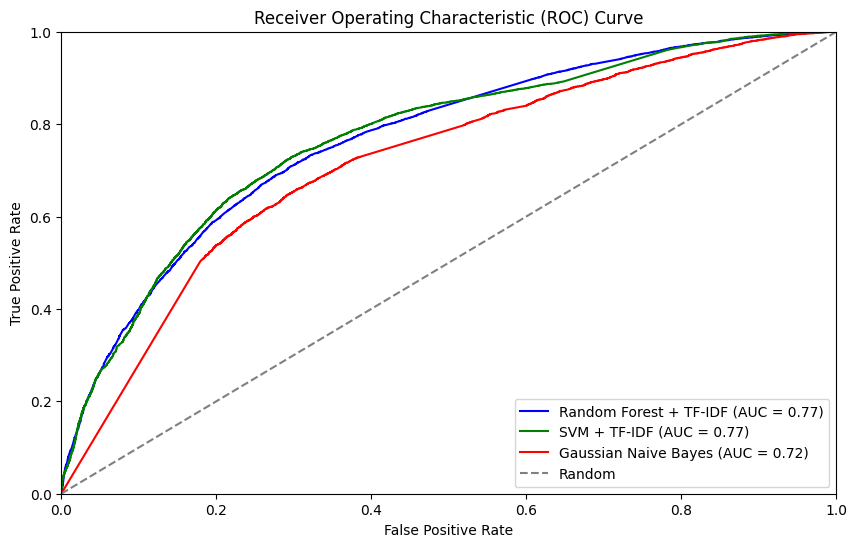

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each classifier

# Compute the False Positive Rate (fpr) and True Positive Rate (tpr) for each classifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_scores)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)

# Compute the Area Under Curve (AUC) for each classifier
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_nb = auc(fpr_nb, tpr_nb)


plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='b', label=f'Random Forest + TF-IDF (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='g', label=f'SVM + TF-IDF (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, color='r', label=f'Gaussian Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()